In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras import Model
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
path = r'S:\VIT AP\SummerInternship1\COVID 19\train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(224,224), class_mode='categorical')

path_test = r'S:\VIT AP\SummerInternship1\COVID 19\test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(224,224), class_mode='categorical')

Found 289 images belonging to 7 classes.
Found 76 images belonging to 7 classes.


In [3]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(7,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [4]:
model = AlexNet(train[0][0].shape[1:])
model.summary()








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 54, 54, 96)        34944     
_________________________________________________________________
bn0 (BatchNormalization)     (None, 54, 54, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max0 (MaxPooling2D)          (None, 26, 26, 96)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 26, 26, 256)       614656    
_________________________________________________________________
bn1 (BatchNormalization)     (None, 26, 26, 256)       1024      
___

In [5]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])
#alex.fit_generator(train,epochs=1)
r = model.fit_generator(
  train,
  validation_data=test,
  epochs=100,
  steps_per_epoch=len(train),
  validation_steps=len(test)
) 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
10/10 [==============================] - 41s 4s/step - loss: 1.3210 - acc: 0.5582 - val_loss: 1.5773 - val_acc: 0.3158
Epoch 2/100
10/10 [==============================] - 39s 4s/step - loss: 0.6471 - acc: 0.8138 - val_loss: 1.2650 - val_acc: 0.4342
Epoch 3/100
10/10 [==============================] - 40s 4s/step - loss: 0.5148 - acc: 0.7762 - val_loss: 1.4272 - val_acc: 0.4079
Epoch 4/100
10/10 [==============================] - 39s 4s/step - loss: 0.4235 - acc: 0.8454 - val_loss: 1.6979 - val_acc: 0.3816
Epoch 5/100
10/10 [==============================] - 40s 4s/step - loss: 0.3368 - acc: 0.8959 - val_loss: 1.7358 - val_acc: 0.4211
Epoch 6/100
10/10 [==============================] - 42s 4s/step - loss: 0.2237 - acc: 0.9495 - val_loss: 2.3099 - val_acc: 0.3553
Epoch 7/100
10/10 [==============================] - 41s 4s/step - loss: 0.3371 - acc: 0.8706 - val_loss: 1.7815 - val_

10/10 [==============================] - 41s 4s/step - loss: 0.0318 - acc: 0.9905 - val_loss: 3.1781 - val_acc: 0.4079
Epoch 60/100
10/10 [==============================] - 41s 4s/step - loss: 0.0134 - acc: 1.0000 - val_loss: 3.6554 - val_acc: 0.3816
Epoch 61/100
10/10 [==============================] - 41s 4s/step - loss: 0.0103 - acc: 1.0000 - val_loss: 3.5032 - val_acc: 0.4079
Epoch 62/100
10/10 [==============================] - 41s 4s/step - loss: 0.0049 - acc: 1.0000 - val_loss: 3.2325 - val_acc: 0.4079
Epoch 63/100
10/10 [==============================] - 40s 4s/step - loss: 0.0042 - acc: 1.0000 - val_loss: 3.0589 - val_acc: 0.4211
Epoch 64/100
10/10 [==============================] - 41s 4s/step - loss: 0.0036 - acc: 1.0000 - val_loss: 3.0384 - val_acc: 0.4474
Epoch 65/100
10/10 [==============================] - 41s 4s/step - loss: 0.0037 - acc: 1.0000 - val_loss: 3.0325 - val_acc: 0.4474
Epoch 66/100
10/10 [==============================] - 40s 4s/step - loss: 0.0042 - acc: 1

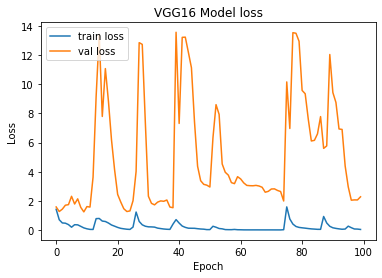

<Figure size 432x288 with 0 Axes>

In [6]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('VGG16 Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('LossVal_loss')

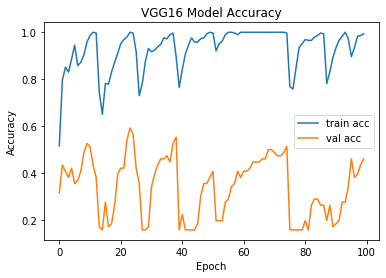

<Figure size 432x288 with 0 Axes>

In [7]:
# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [8]:
import tensorflow as tf
from keras.models import load_model

In [10]:
model.save('covidchestalexnet.h5')

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [12]:
predict = model.predict_generator(test_set, steps=len(test_set), verbose=1)
test_label = test_set.classes

NameError: name 'test_set' is not defined

In [14]:
#confusion matrix
print('Confusion Matrix')
confusion_matrix(test_label, predict.argmax(axis=1))

Confusion Matrix


NameError: name 'test_label' is not defined

In [ ]:
#plot for confusion matrix
import matplotlib.pyplot as plt
import numpy as np
cm = metrics.confusion_matrix(test_labels, predict.argmax(axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [ ]:
#classification report
cr_labels = list(test_set.class_indices.keys())
classification_report(test_labels, predict.argmax(axis=1), target_names=cr_labels)

In [ ]:
#accuracy score
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))